# random snippets

## load multiple csv files into pandas dataframe

In [53]:
BASE = "/home/jovyan/data/mk/timeseries/"

file = BASE + "1.csv"
#reader = csv.reader(open(file, "rb"), delimiter=",")

with open(file, "r") as f:
    headers = f.readline()
    
headers = headers.split(",")

In [54]:
import numpy as np
import pandas as pd

x = np.loadtxt(
    open(file, "rb"), 
    delimiter=",", 
    skiprows=1
)
dataFrame = pd.DataFrame(x)
    
    
for i in range(2,8):
    file = BASE + str(i) + ".csv"
    print("loading", i)
    x = np.loadtxt(
        open(file, "rb"), 
        delimiter=",", 
        skiprows=1
    )
    dataFrame = dataFrame.append(pd.DataFrame(x), ignore_index = True)
#x = list(reader)

dataFrame.columns = headers

loading 2
loading 3
loading 4
loading 5
loading 6
loading 7


In [55]:
dataFrame

,cpu_alerta.lab_mean_usage_guest,cpu_alerta.lab_mean_usage_guest_nice,cpu_alerta.lab_mean_usage_idle,cpu_alerta.lab_mean_usage_iowait,cpu_alerta.lab_mean_usage_irq,cpu_alerta.lab_mean_usage_nice,cpu_alerta.lab_mean_usage_softirq,cpu_alerta.lab_mean_usage_steal,cpu_alerta.lab_mean_usage_system,cpu_alerta.lab_mean_usage_user,...,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_completed,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_largest,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_queue,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_rejected,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_threads,elasticsearch_transport_elastic.lab_XEI5kEd_mean_rx_count,elasticsearch_transport_elastic.lab_XEI5kEd_mean_rx_size_in_bytes,elasticsearch_transport_elastic.lab_XEI5kEd_mean_server_open,elasticsearch_transport_elastic.lab_XEI5kEd_mean_tx_count,elasticsearch_transport_elastic.lab_XEI5kEd_mean_tx_size_in_bytes
0,0.0,0.0,99.633276,0.008333,0.0,0.0,0.007499,0.0,0.080861,0.270030,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,99.641441,0.012508,0.0,0.0,0.000833,0.0,0.078363,0.266856,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,99.622385,0.008334,0.0,0.0,0.003333,0.0,0.090843,0.275104,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,99.620638,0.024191,0.0,0.0,0.004167,0.0,0.080049,0.270954,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,99.673093,0.009166,0.0,0.0,0.004170,0.0,0.080066,0.233505,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,99.614249,0.020828,0.0,0.0,0.008335,0.0,0.103352,0.253236,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,99.636592,0.020004,0.0,0.0,0.000000,0.0,0.083389,0.260015,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,99.655004,0.009161,0.0,0.0,0.000000,0.0,0.087541,0.248295,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,99.651484,0.012504,0.0,0.0,0.005000,0.0,0.071730,0.259282,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,99.671592,0.011664,0.0,0.0,0.007501,0.0,0.091687,0.217556,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## plot data

In [56]:
import matplotlib.pyplot as plt

In [69]:
#row = dataFrame.loc[0]
col = dataFrame["cpu_tick.lab_mean_usage_user"]
#col = np.array(col)

<function matplotlib.pyplot.show>

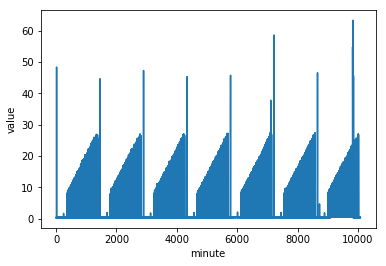

In [70]:
plt.plot(col)
plt.ylabel('value')
plt.xlabel('minute')
plt.show

## Preprocess

In [71]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [146]:
smoothed = movingaverage(col, 15)
#smoothed = smoothed.flatten()
smoothed = np.pad(smoothed, (14,0), 'constant')
len(smoothed)
#smoothed[0:15]
#pad = [0]*14
#smoothed = [0]*14 + smoothed

10080

<function matplotlib.pyplot.show>

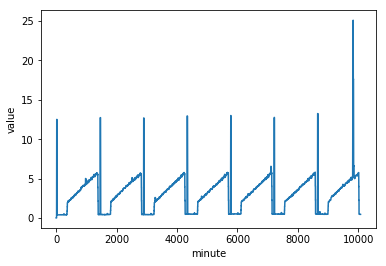

In [147]:
plt.plot(smoothed)
plt.ylabel('value')
plt.xlabel('minute')
plt.show

## trend

In [148]:
def centeredMovingAverage(x, n):
    partial = 1 / ( n*2 )
    weights = [ partial ]
    for i in range(n-1):
        weights.append(1 / n)
    weights.append(partial)
    
    wma = np.convolve(x, weights, "valid")
    return wma

In [160]:
train = smoothed[0:1440*6]
trend = centeredMovingAverage(train, 1440)

day1 = train[0:720]
dayLast = train[1440*6-720:1440*6]

train = train[720:-720]
noTrend = train - trend

<function matplotlib.pyplot.show>

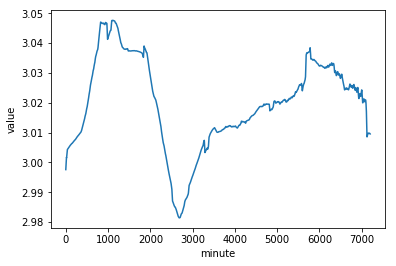

In [161]:
plt.plot(trend)
#plt.plot(noTrend)
plt.ylabel('value')
plt.xlabel('minute')
plt.show

In [119]:
# wip
cycles = 6
seasons = 1440

for i in range(cycles):
    day = trend[i*seasons:i*seasons+seasons]
    #print(i)
    #plt.plot(day)
    #plt.ylabel('value')
    #plt.xlabel('minute')
    #plt.show